### Checking out the data for obvious outliers, special features, feature scales etc.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data = pd.read_csv("../data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The ames housing data has therefore 3 continuous scalar features, 35 integer features and 43 (!) categorical features. This is mainly a categorical feature based dataset. Interesting.

In [8]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Total of 81 Columns (ie. Features). Multiple continuous & integer scalar features and a lot of categorical features. There's more categorical features than actual numerical features. Let us further investigate categorical features.

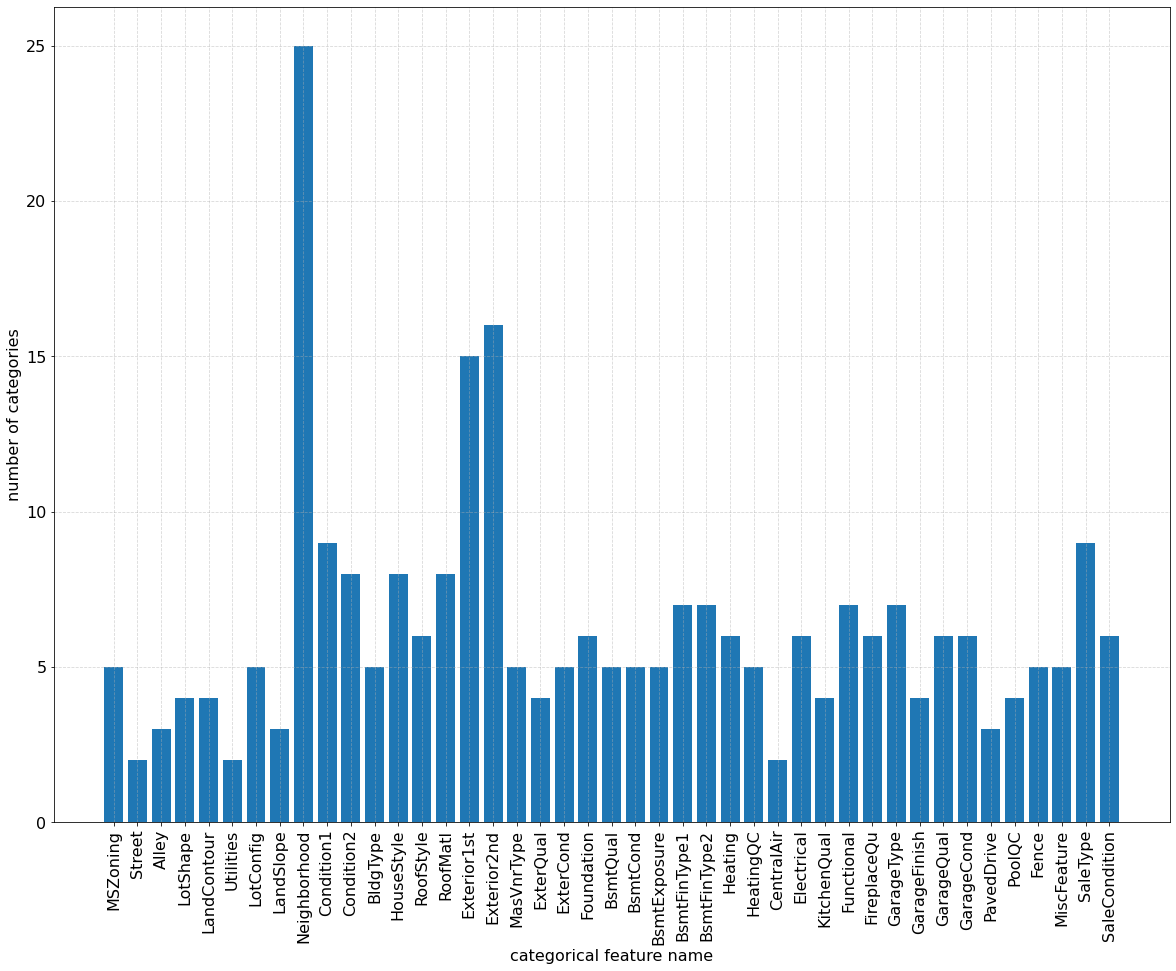

In [39]:
df_sel = data.select_dtypes(include="object")
columns = df_sel.columns.tolist()
num_categories = []
fig, ax = plt.subplots(figsize=(20,15))
for column in df_sel:
    num_categories.append(len(df_sel[column].unique()))
x = np.arange(len(columns))
ax.bar(x, num_categories)
plt.xticks(x, columns, rotation="vertical", fontsize=20)
plt.grid(alpha=0.5, linestyle="--")
plt.ylabel("number of categories", fontsize=16)
plt.xlabel("categorical feature name", fontsize=16)
ax.tick_params(labelsize=16)
plt.show()